Found 1041 images belonging to 3 classes.
Found 258 images belonging to 3 classes.

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\user\Anaconda\envs\tensorflow_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 603ms/step - accuracy: 0.4855 - loss: 0.9920 - val_accuracy: 0.5891 - val_loss: 0.8527
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 240ms/step - accuracy: 0.6789 - loss: 0.7509 - val_accuracy: 0.6667 - val_loss: 0.7242
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 243ms/step - accuracy: 0.7569 - loss: 0.5939 - val_accuracy: 0.6550 - val_loss: 0.7011
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 241ms/step - accuracy: 0.7689 - loss: 0.5231 - val_accuracy: 0.7209 - val_loss: 0.6222
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 266ms/step - accuracy: 0.8323 - loss: 0.4125 - val_accuracy: 0.7558 - val_loss: 0.5451
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 274ms/step - accuracy: 0.9141 - loss: 0.2471 - val_accuracy: 0.7481 - val_loss: 0.6202
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 268ms/step - accuracy: 0.9288 - loss: 0.2136 - val_accuracy: 0.8333 - val_loss: 0.4927
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 276ms/step - accuracy: 0.9414 - loss: 0.1606 - val_accuracy: 0

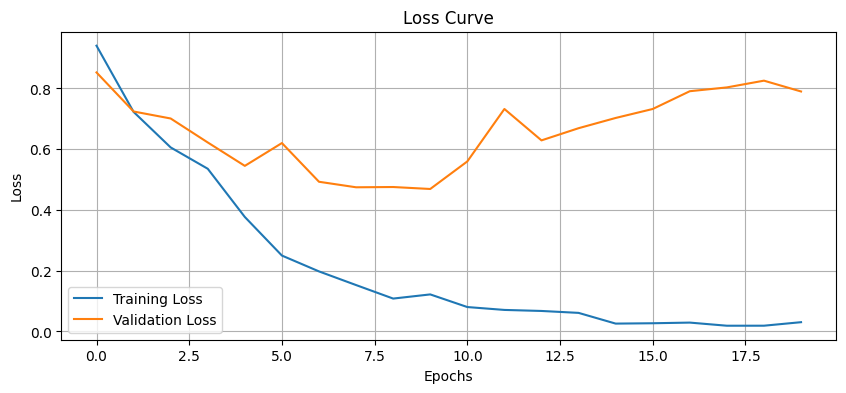

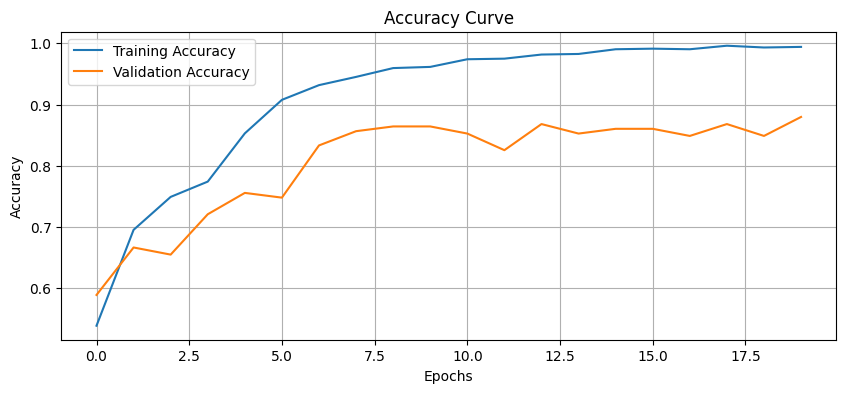


Enter the path of an image to predict (or type 'exit' to quit):


Image Path:  exit


Exiting prediction loop.
Model saved as 'line_following_robot_cnn.h5'.


In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------
# Dataset Directories
# ----------------------------------------
base_dir = "dataset"  # Path to your dataset folder
categories = ["straight", "left", "right"]

# Check dataset structure
for category in categories:
    folder_path = os.path.join(base_dir, category)
    if not os.path.exists(folder_path):
        print(f"Folder not found: {folder_path}")
        exit()

# ----------------------------------------
# Data Preprocessing
# ----------------------------------------
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    validation_split=0.2  # Reserve 20% of data for validation
)

# Training data generator
train_data = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),  # Resize images to 128x128 pixels
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    subset='training'
)

# Validation data generator
val_data = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# ----------------------------------------
# Build the CNN Model
# ----------------------------------------
def build_model(input_shape, num_classes):
    """
    Build a CNN model for image classification.
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Regularization
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (128, 128, 3)  # RGB images
num_classes = len(categories)
model = build_model(input_shape, num_classes)

# Model summary
print("\nModel Summary:")
model.summary()

# ----------------------------------------
# Train the Model
# ----------------------------------------
epochs = 20  # Number of epochs
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    verbose=1
)

# ----------------------------------------
# Evaluate the Model
# ----------------------------------------
print("\nEvaluating the Model:")
val_loss, val_accuracy = model.evaluate(val_data, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.2%}")

# Predict classes for validation set
y_pred_probs = model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_data.classes  # True labels

# ----------------------------------------
# Visualize Training and Validation Metrics
# ----------------------------------------
def plot_training_curves(history):
    """
    Plot training and validation loss/accuracy.
    """
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

plot_training_curves(history)

# ----------------------------------------
# Predict User Input Image
# ----------------------------------------
def predict_user_image(model, image_path):
    """
    Predict the class of a user-provided image.

    Args:
        model: Trained CNN model.
        image_path: Path to the input image.
    """
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return

    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    predictions = model.predict(image)
    predicted_class = np.argmax(predictions)
    confidence = predictions[0][predicted_class]
    print(f"Predicted Class: {categories[predicted_class]} (Confidence: {confidence:.2%})")

# ----------------------------------------
# Interactive Prediction Loop
# ----------------------------------------
while True:
    print("\nEnter the path of an image to predict (or type 'exit' to quit):")
    user_input = input("Image Path: ").strip()

    if user_input.lower() == 'exit':
        print("Exiting prediction loop.")
        break

    predict_user_image(model, user_input)

# ----------------------------------------
# Save the Model
# ----------------------------------------
model.save("line_following_robot_cnn.h5")
print("Model saved as 'line_following_robot_cnn.h5'.")
